# Создание первого чатбота

Чат-бот— это программа, которая имитирует реальный разговор с пользователем. Чат-боты позволяют общаться с помощью текстовых или аудио сообщений на сайтах, в мессенджерах, мобильных приложениях 

Основные преимущества

* Обеспечивают сервисное обслуживание 24/7
* Помогают охватить больше клиентов
* Экономность
* Легкость в эксплуатации
	
Как они работают?
Большинство людей не будут создавать своих чат-ботов с нуля, так как сегодня существует достаточно большой выбор всевозможных фреймворков и сервисов, которые могут помочь в создании чат-бота. Однако чтобы понять, как они работают нужно погрузиться немного глубже.
Бэкенд: Чат-боты могут быть разработаны на любом языке программирования
Фронтенд: Это может быть любой мессенджер: от популярных вроде Facebook Messenger, Slack, Telegram до простеньких Realtime Chat With Node.js. Вы не ограничены одной платформой: один и тот же бот может работать, по сути, везде.

## Шаг 1. Создаём бота в Telegram

Открываем телеграм и ищем чат @botfather. 
Сначала пишем /newbot. Затем задаем имя, потом id.
После создания бота нам придёт API токен, он нам понадобится в дальнейшем.

## Шаг 2. Пишем основу бота

Устанавливаем библиотеку python-telegram-bot. Ссылка на документацию https://github.com/python-telegram-bot/python-telegram-bot

In [ ]:
!pip install python-telegram-bot --upgrade

Явно зададим кодировку нашего кода

In [4]:
# -- coding: utf-8 -

In [1]:
from telegram.ext  import Updater, CommandHandler, MessageHandler, Filters
import dialogflow

telegram.ext подмодуль, предоставлющий простой в использовании интерфейс. Он состоит из нескольких классов, но двумя наиболее важными из них являются telegram.ext.Updater и telegram.ext.Dispatcher.
Класс Updater непрерывно получает новые обновления  из телеграмма и передает их в Dispatcher класс.
Если вы создадите Updater объект, он создаст Dispatcher для вас и свяжет их вместе.


In [2]:
#Настройки 
from telegram.ext  import Updater, CommandHandler, MessageHandler, Filters
import dialogflow

updater = Updater(token='1234567890:A0000000000rno8jyce60z1D30000000000') # Токен API к Telegram
dispatcher = updater.dispatcher

Затем вы можете зарегистрировать обработчики разных типов в Dispatcher, который будет сортировать обновления, извлеченные в Updater соответствии с зарегистрированными вами обработчиками, и доставлять их в функцию обратного вызова, которую вы определили.


Напишем 2 обработчика команд. Это callback-функции, которые будут вызываться тогда, когда будет получено обновление. Напишем две таких функции для команды /start и для обычного любого текстового сообщения. В качестве аргументов туда передаются два параметра: bot и update. Bot содержит необходимые методы для взаимодействия с API, а update содержит данные о пришедшем сообщении.


In [3]:
# Обработка команд
def startCommand(bot, update):
    bot.send_message(chat_id=update.message.chat_id, text='Добрый день')
    
def textMessage(bot, update):
    response = 'Ваше сообщение принял ' + update.message.text # формируем текст ответа
    bot.send_message(chat_id=update.message.chat_id, text=response)

Каждый обработчик является экземпляром любого подкласса класса telegram.ext.Handler . Библиотека предоставляет классы-обработчики почти для всех вариантов использования, но если вам нужно что-то очень конкретное, вы также можете создать подкласс Handler самостоятельно.

Теперь осталось лишь присвоить уведомлениям эти обработчики и начать поиск обновлений.
Цель состоит в том, чтобы вызывать эту функцию каждый раз, когда бот получает сообщение Telegram, содержащее /start команду. Для этого можно использовать CommandHandler(один из предоставленных подклассов Handler) и зарегистрировать его в диспетчере:
Класс Filters содержит ряд функций, которые фильтруют входящие сообщения на наличие текста, изображений, обновлений статуса и т.д. 
Любое сообщение, которое возвращает True в хотя бы одном из переданных фильтров, MessageHandler примет. Также можно написать свои собственные фильтры.


In [5]:
import logging

from telegram import Update
from telegram.ext import Updater, CommandHandler, MessageHandler, Filters, CallbackContext

import dialogflow

In [5]:
import logging
# Enable logging
logging.basicConfig(
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', level=logging.INFO
)

logger = logging.getLogger()

In [6]:
# Define a few command handlers. These usually take the two arguments update and
# context. Error handlers also receive the raised TelegramError object in error.
def start(update: Update, context: CallbackContext):
    update.message.reply_text('Hi!')

def echo(update: Update, context: CallbackContext):
    txt = update.message.text
    
    update.message.reply_text('Ваше сообщение! ' + update.message.text)

In [7]:
updater = Updater(token='1234567890:A0000000000rno8jyce60z1D30000000000', use_context=True)
dispatcher = updater.dispatcher

# on different commands - answer in Telegram
dispatcher.add_handler(CommandHandler("start", start))
dispatcher.add_handler(MessageHandler(Filters.text & ~Filters.command, echo))

# Start the Bot
updater.start_polling()
updater.idle()

Создаём папку Bot, в которой потом создаём файл bot.py. 
Вы можете создать просто текстовый блокнот и вместо расширения .txt  напишите .py
Собираем код нашего бота.
Открываем консоль и переходим в директорию с файлом, и запускаем python3 bot.py
Бот будет работать пока будет открыто окно консоли. 

## Шаг 3 Dialogflow

https://dialogflow.cloud.google.com/#/login

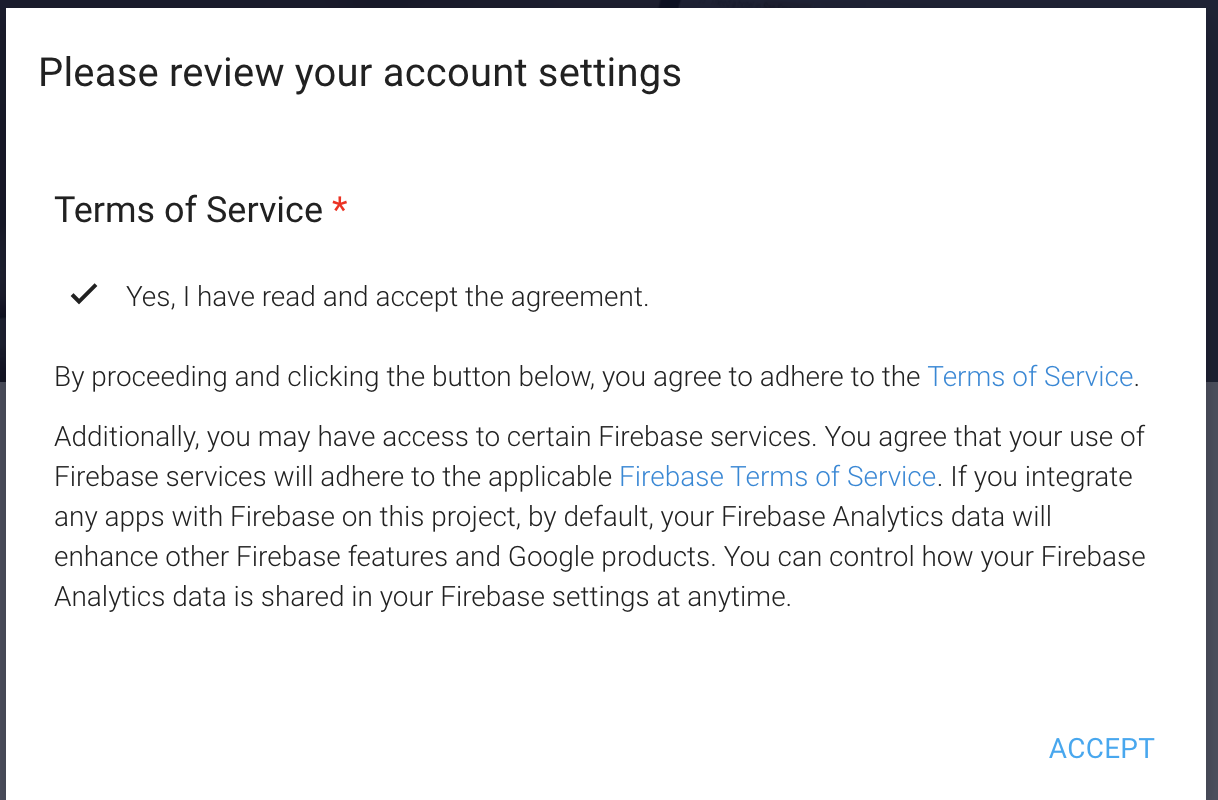

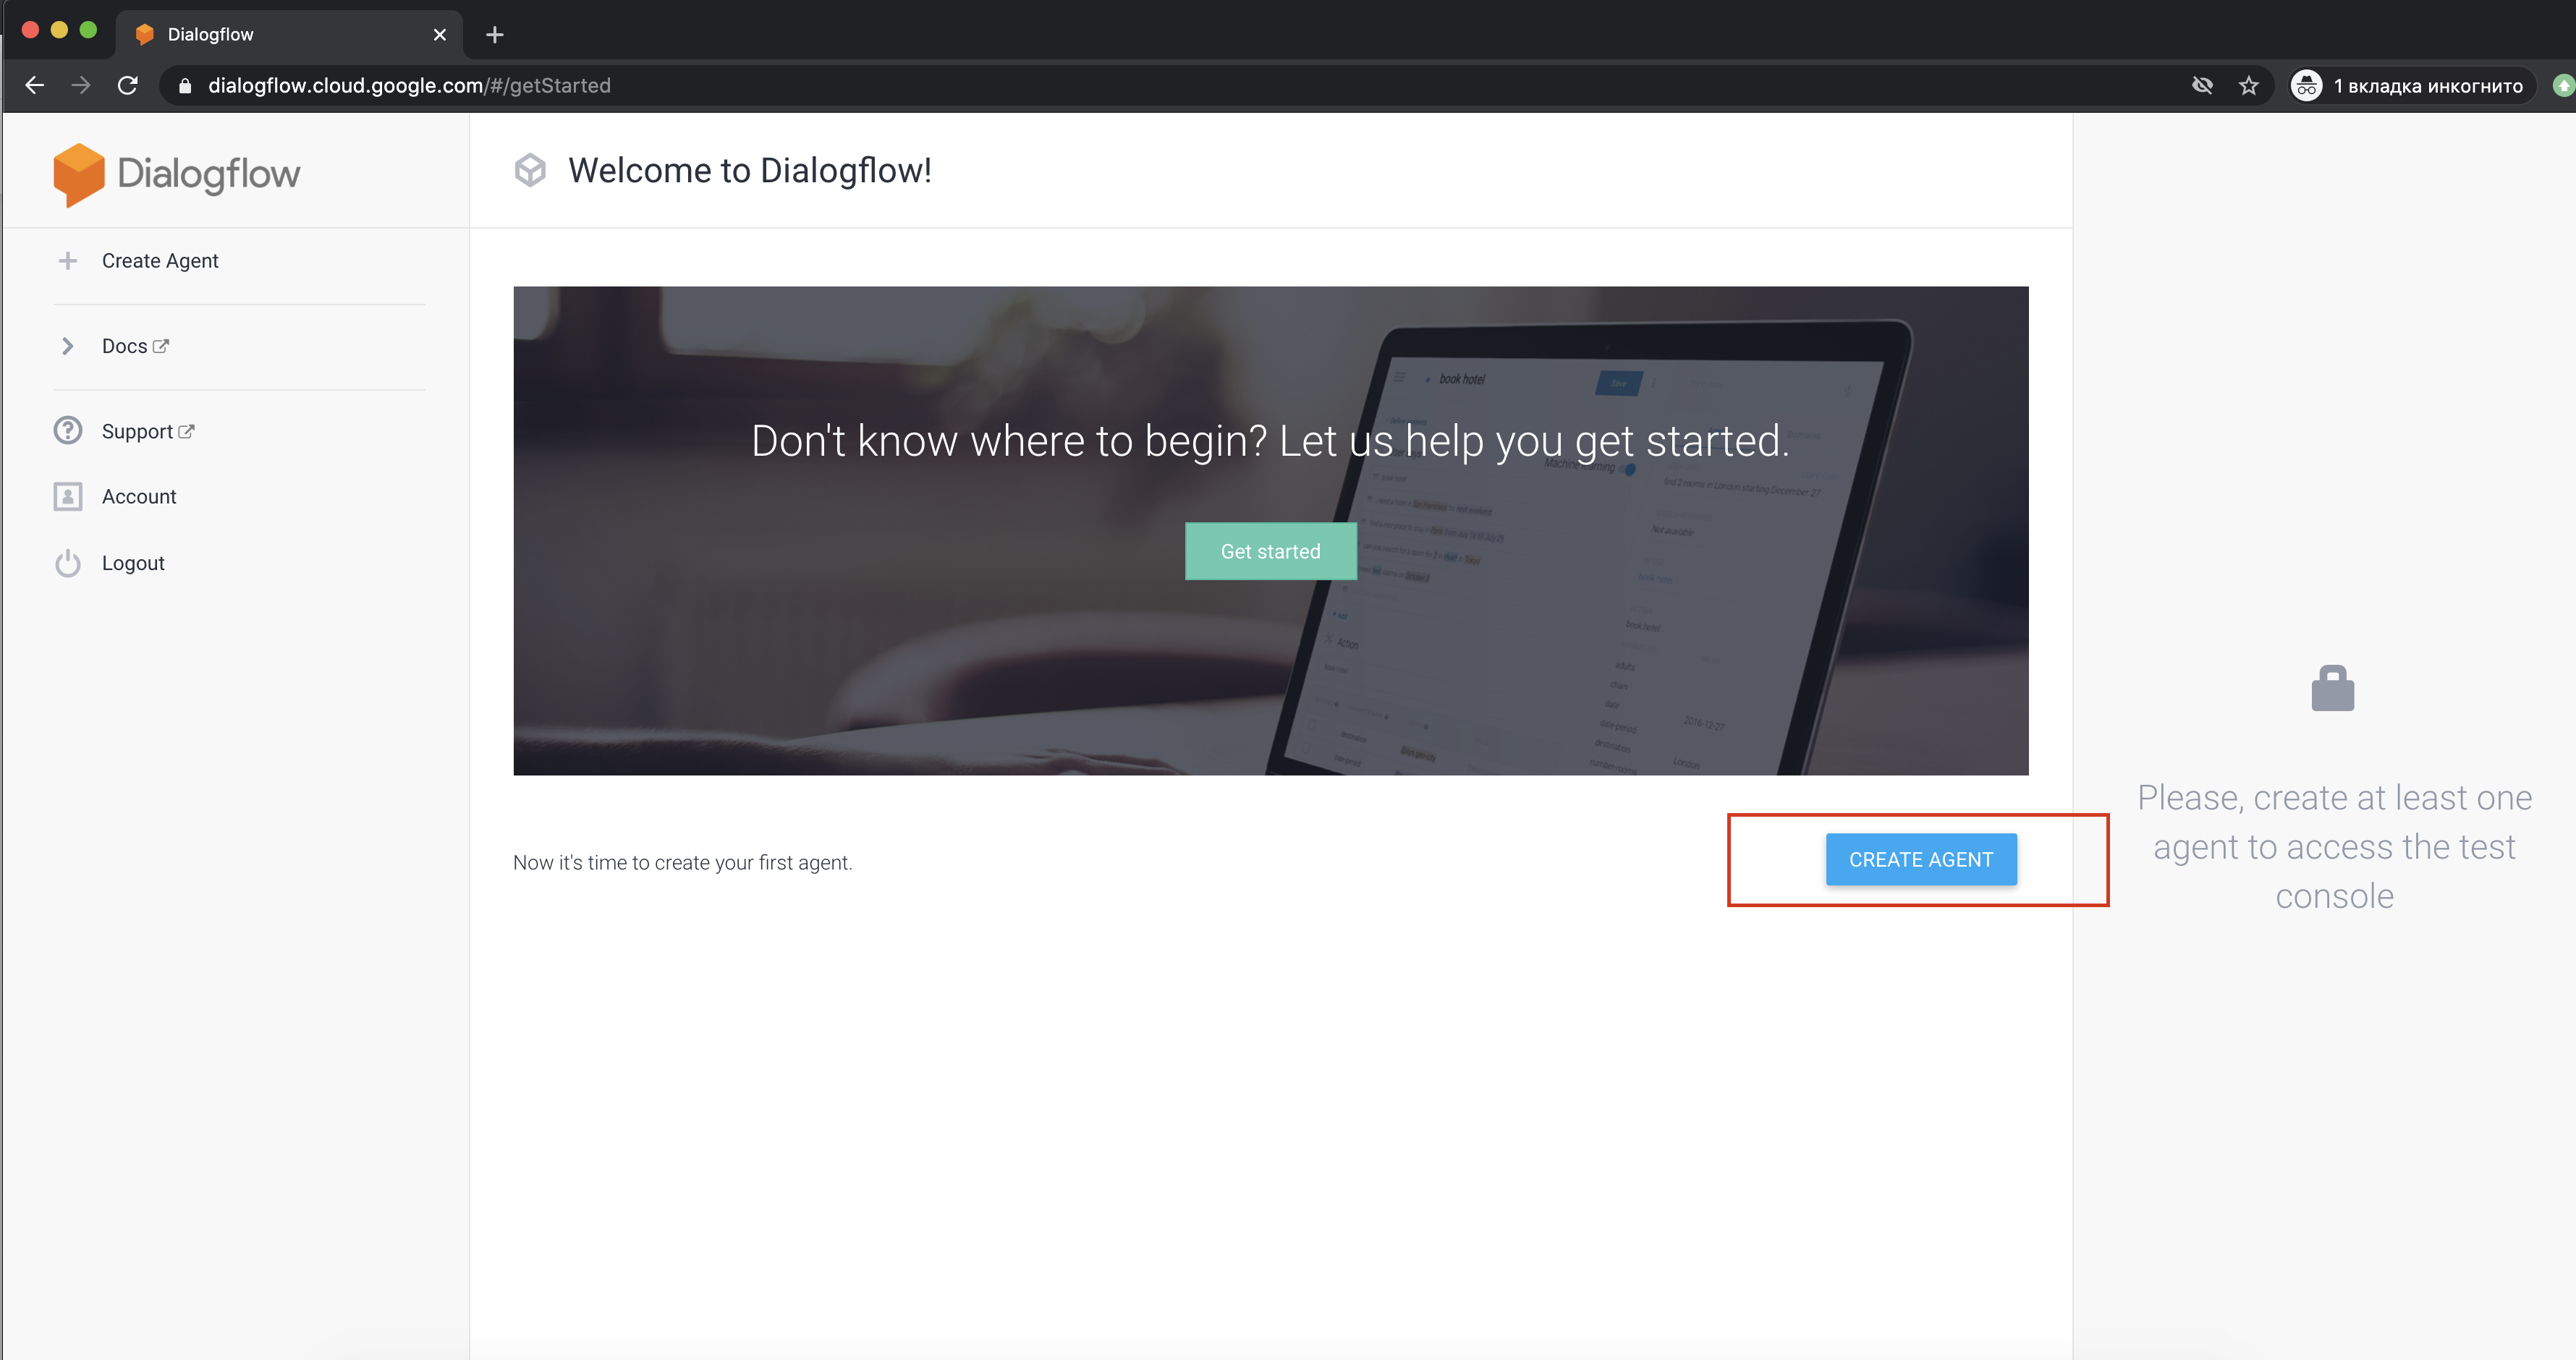

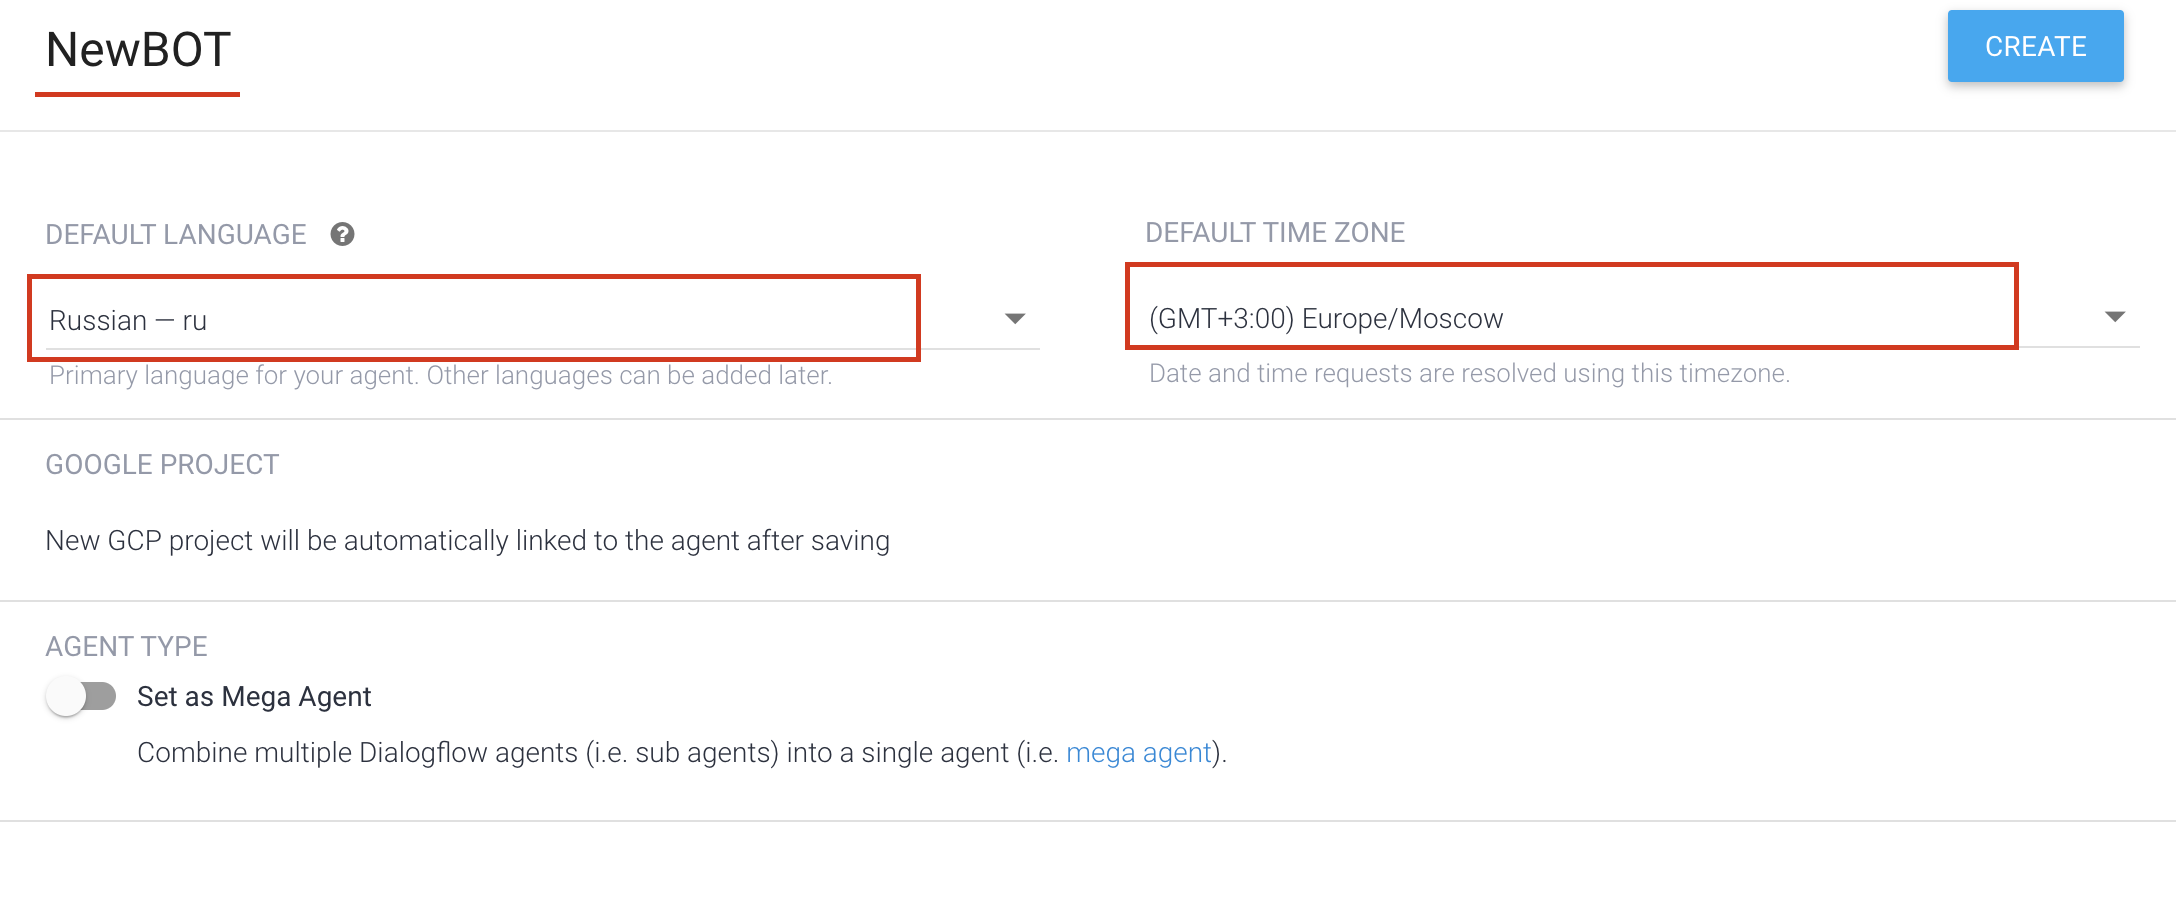

Панель управления слева.  Выбираем Small-talk

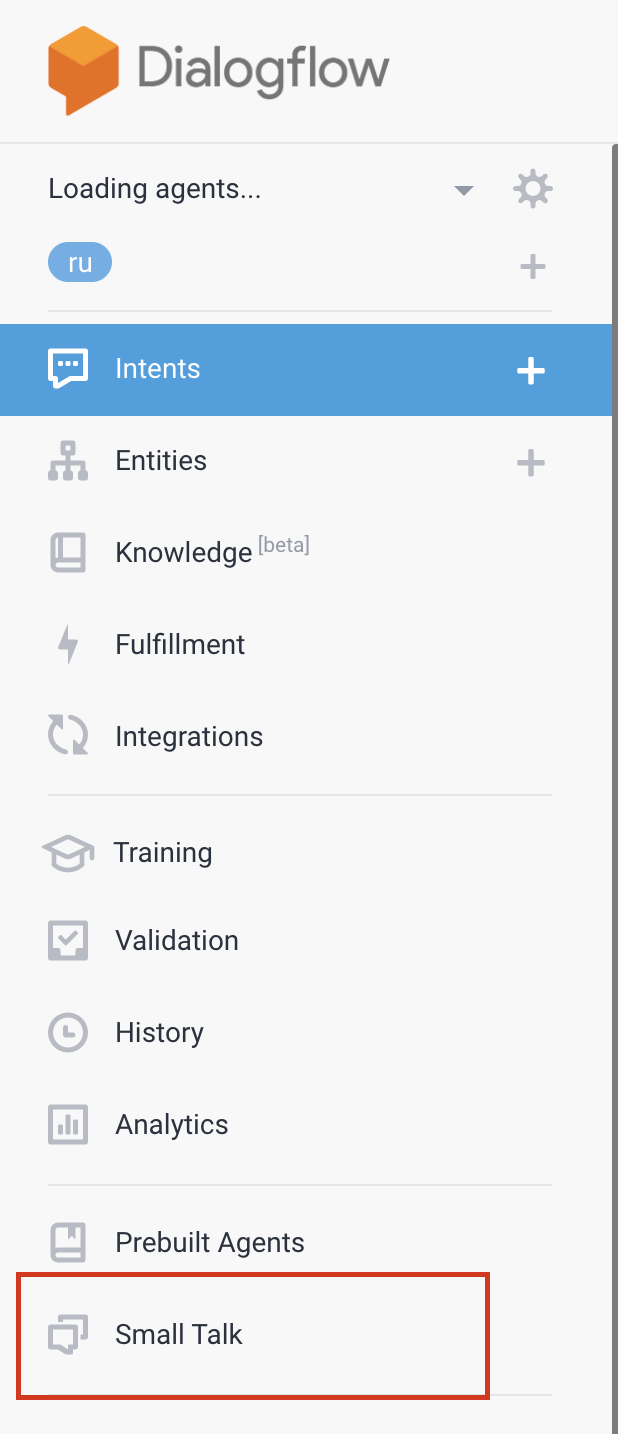

Выбинаем Enable и SAVE

Снимок экрана 2020-07-19 в 16.21.00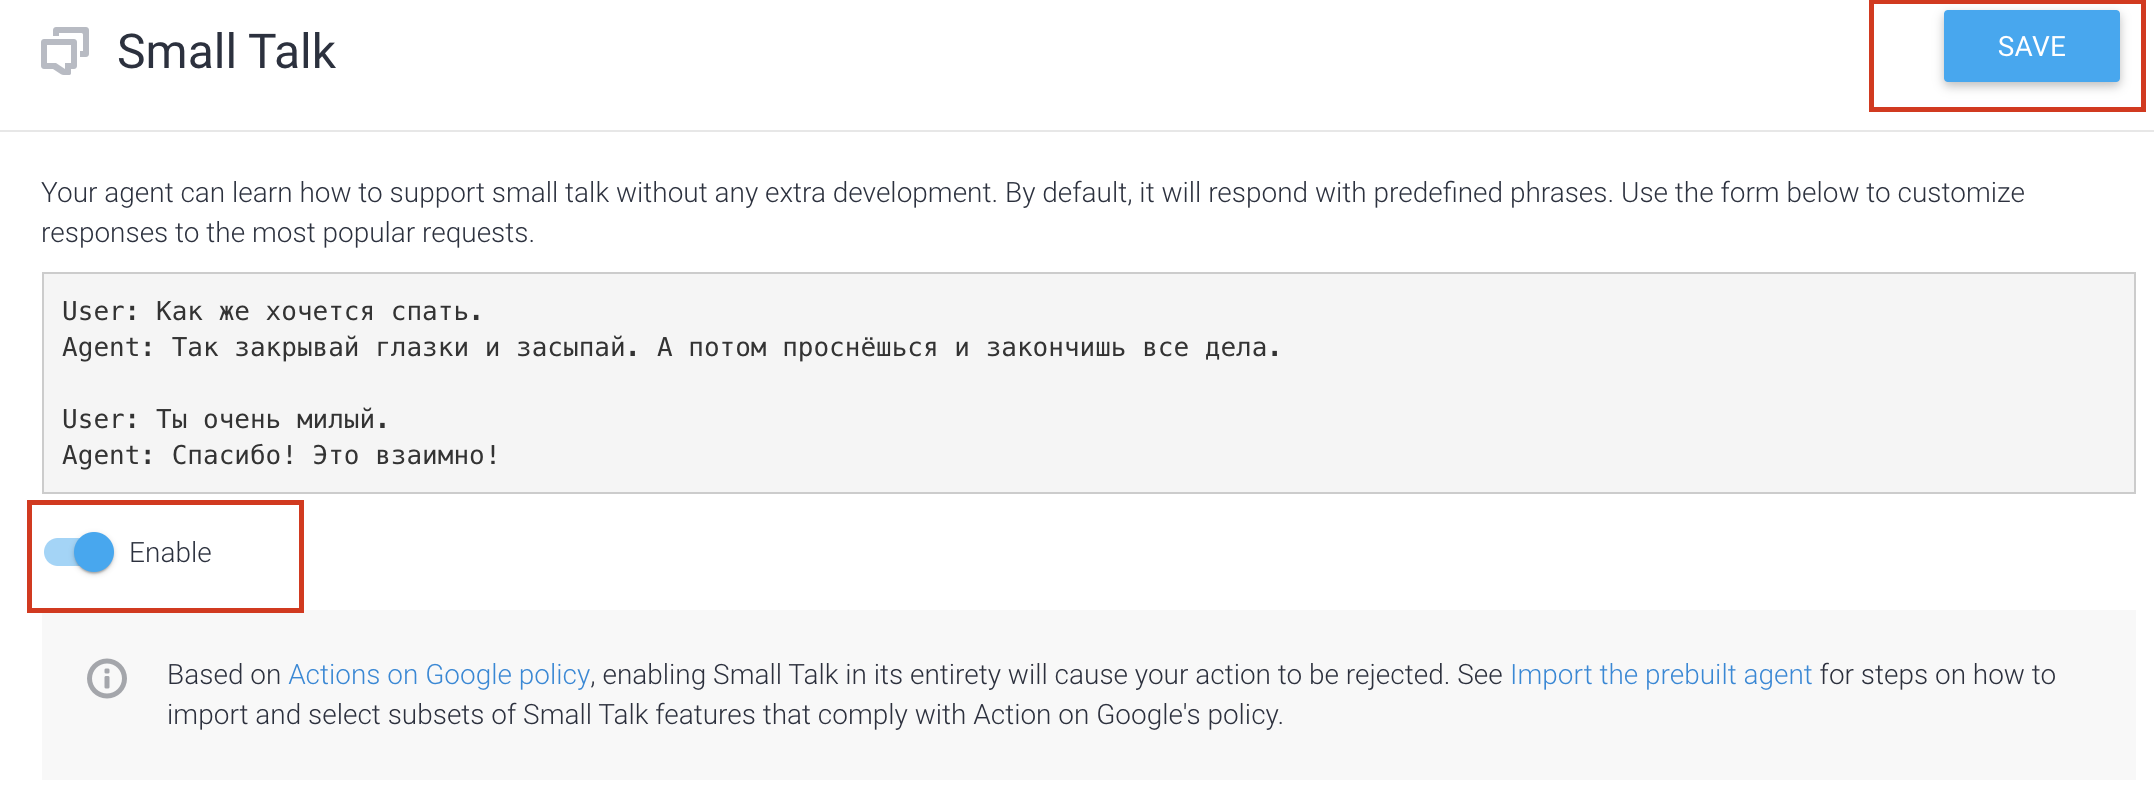

Бот можно протестировать справа

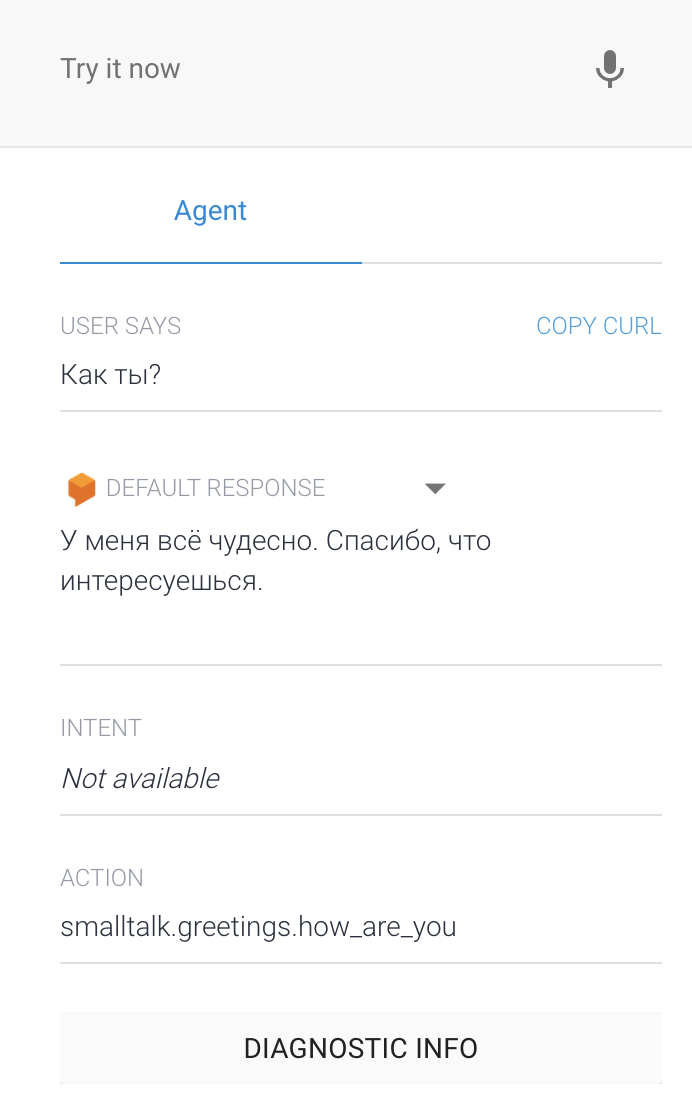

Переходим на страничку с документацией https://googleapis.dev/python/dialogflow/latest/index.html
И проходим по ссылке

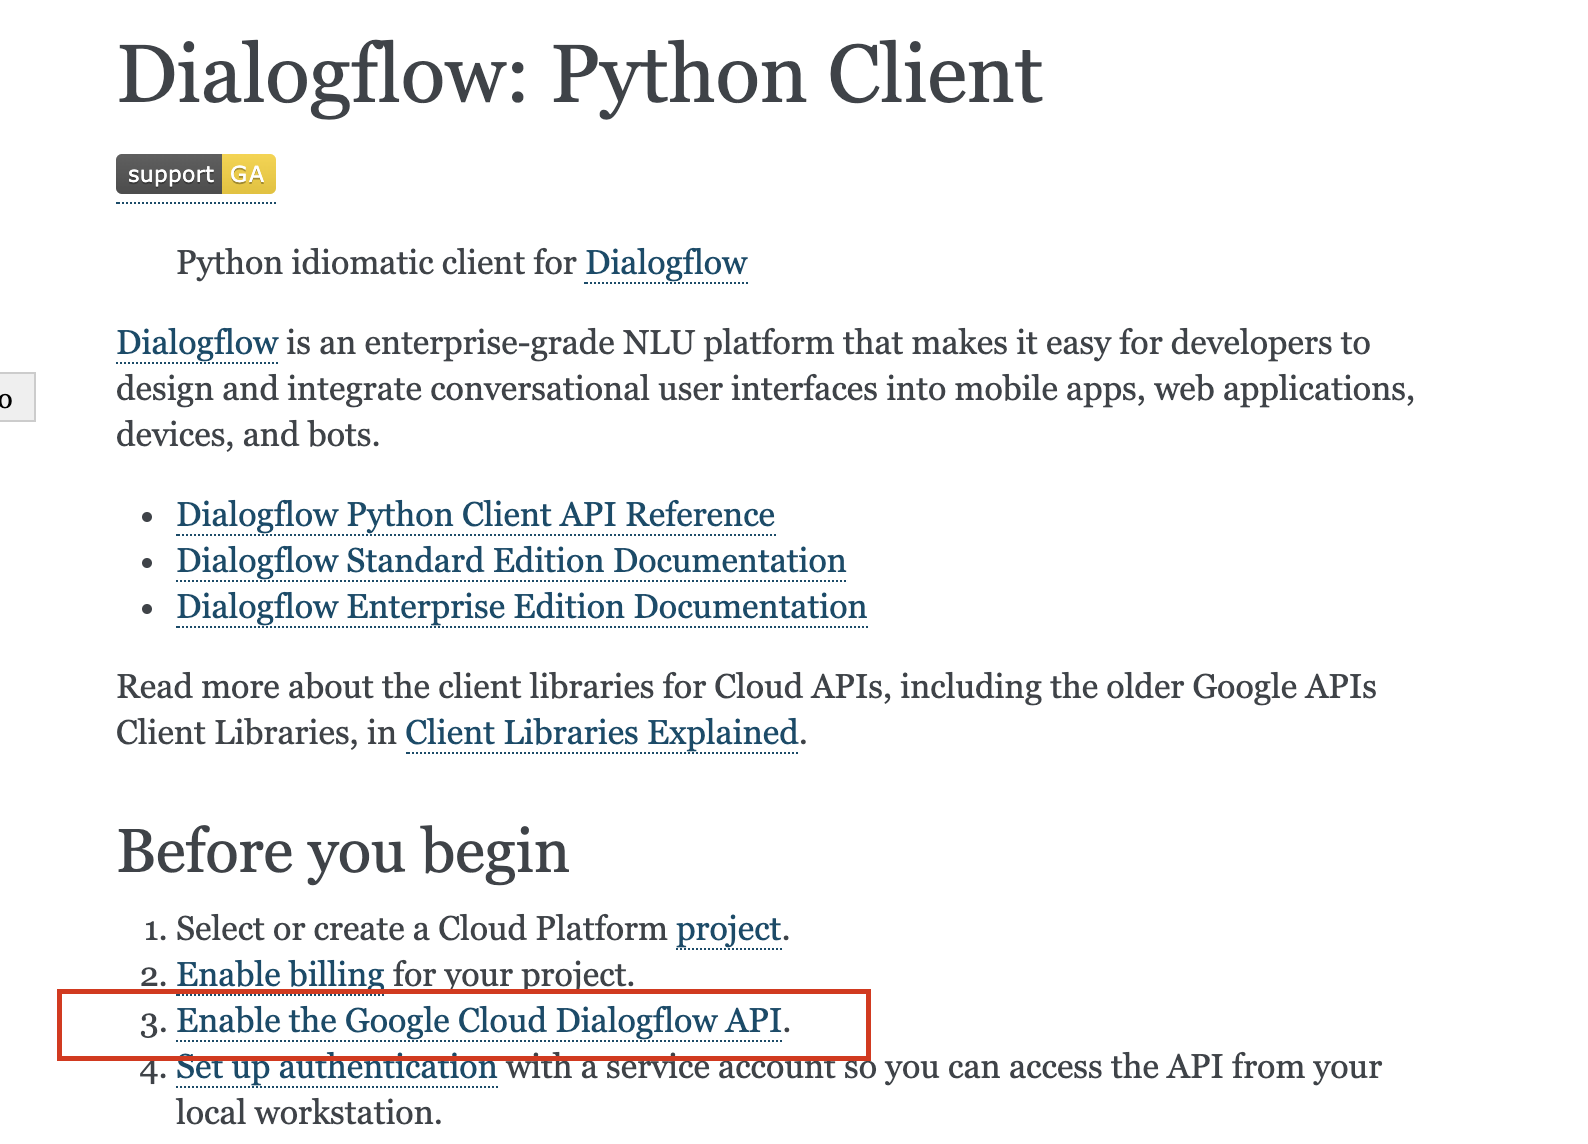

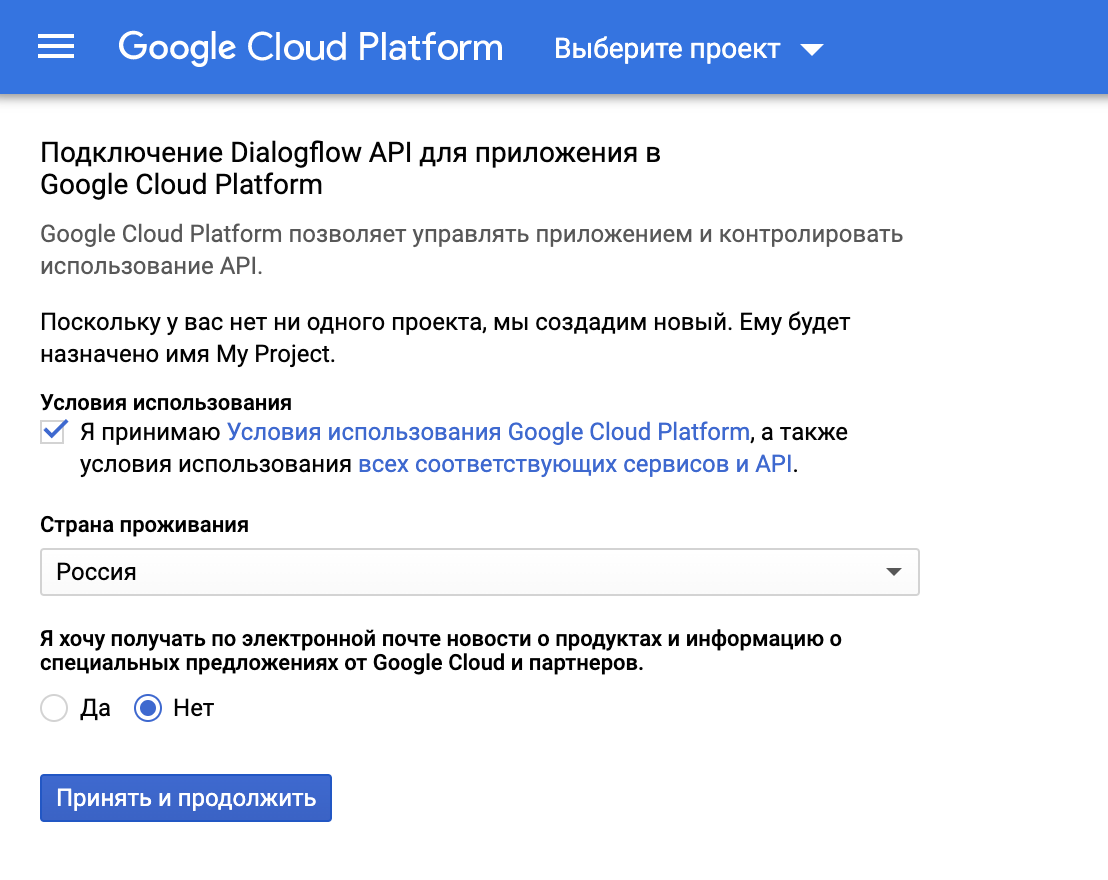

Выбираем свой проект

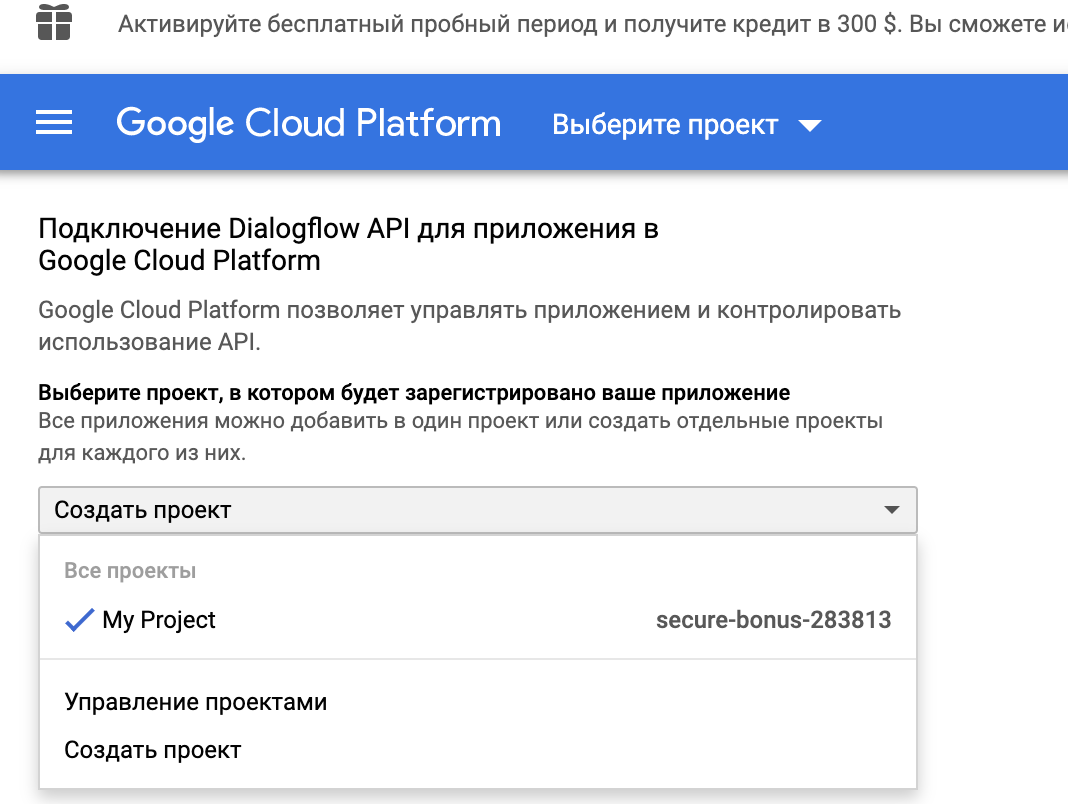

Создаем учетные данные

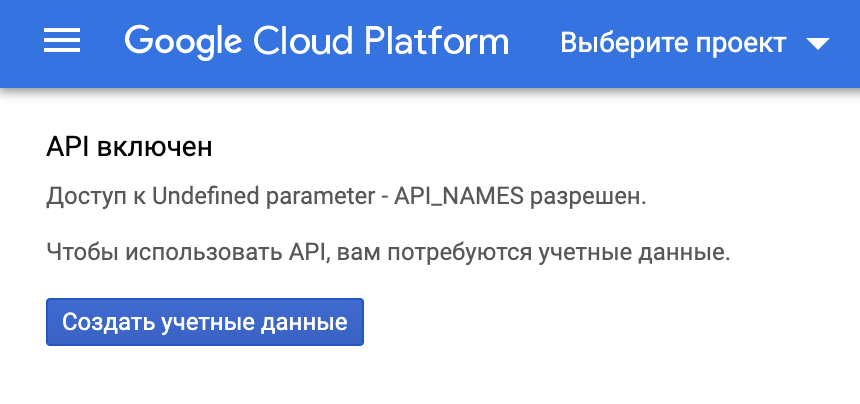

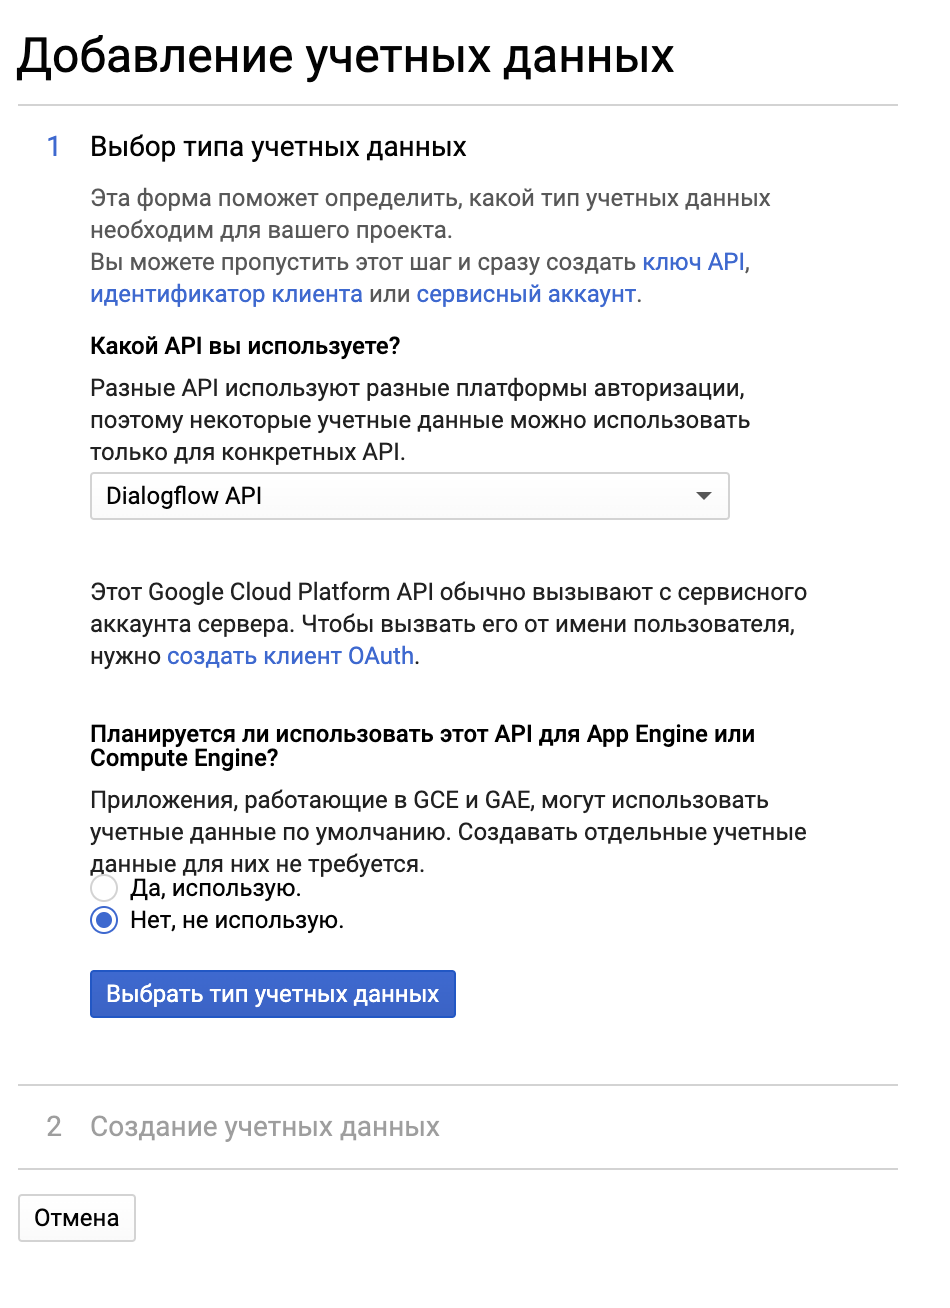

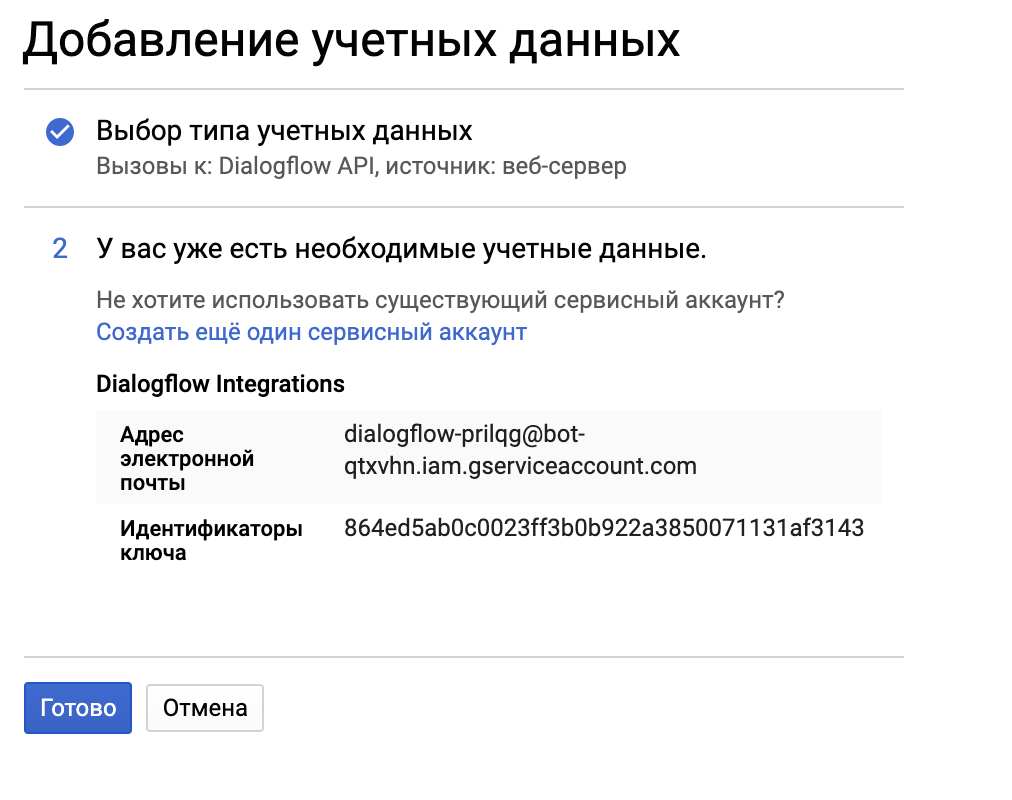

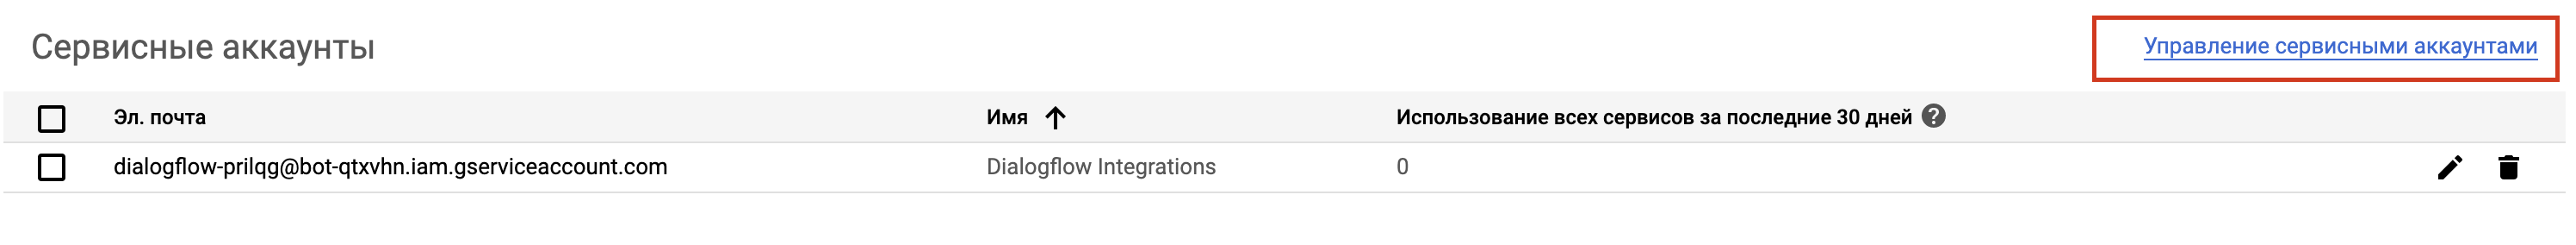

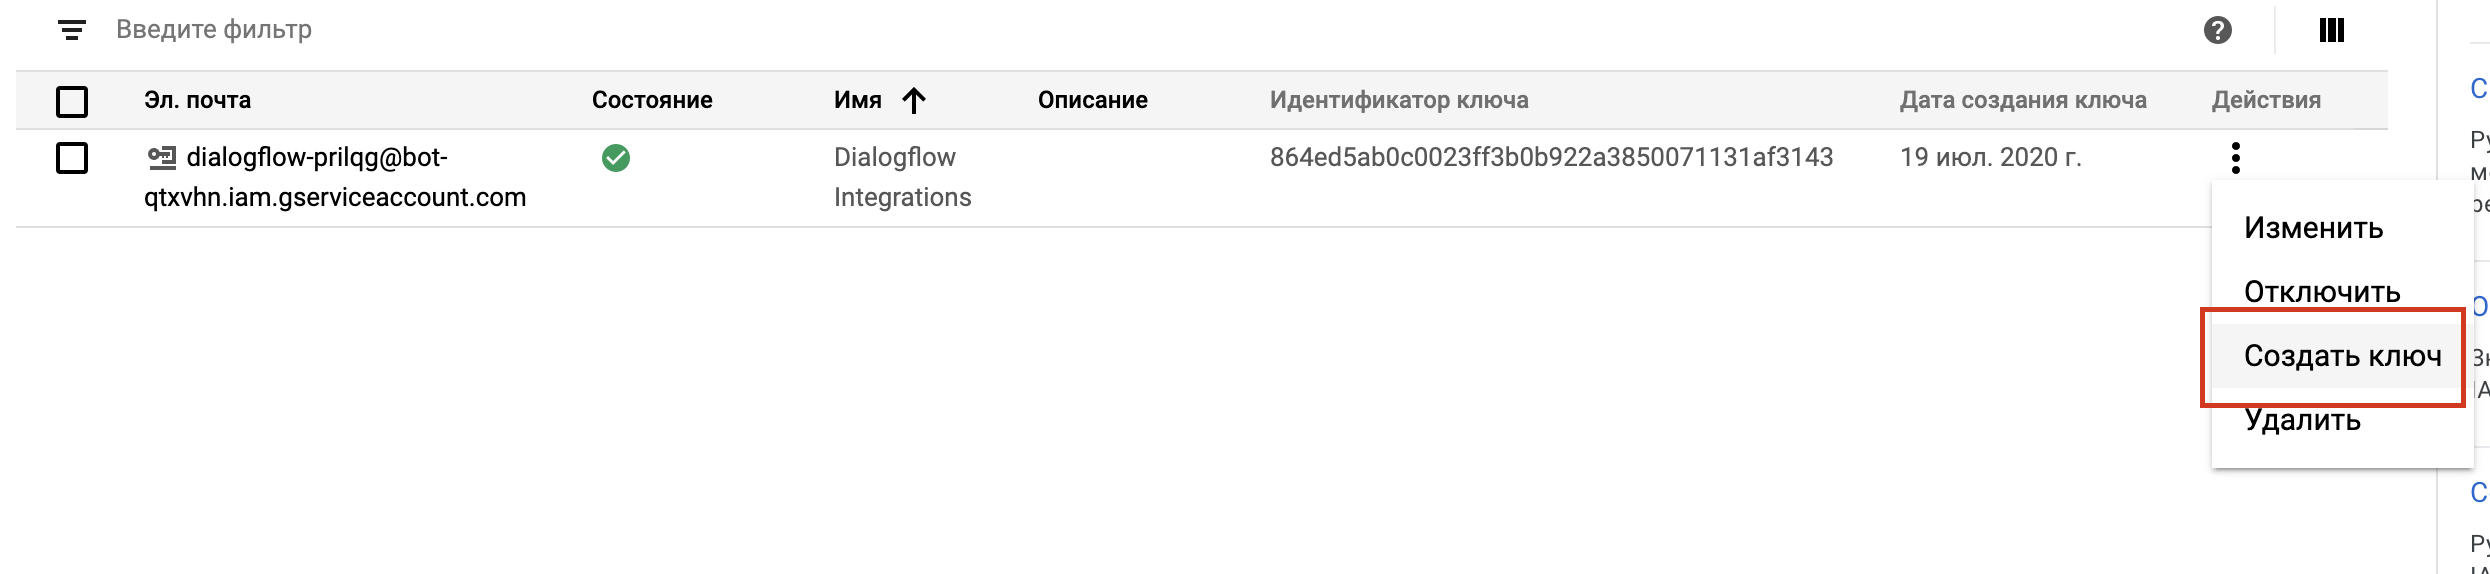

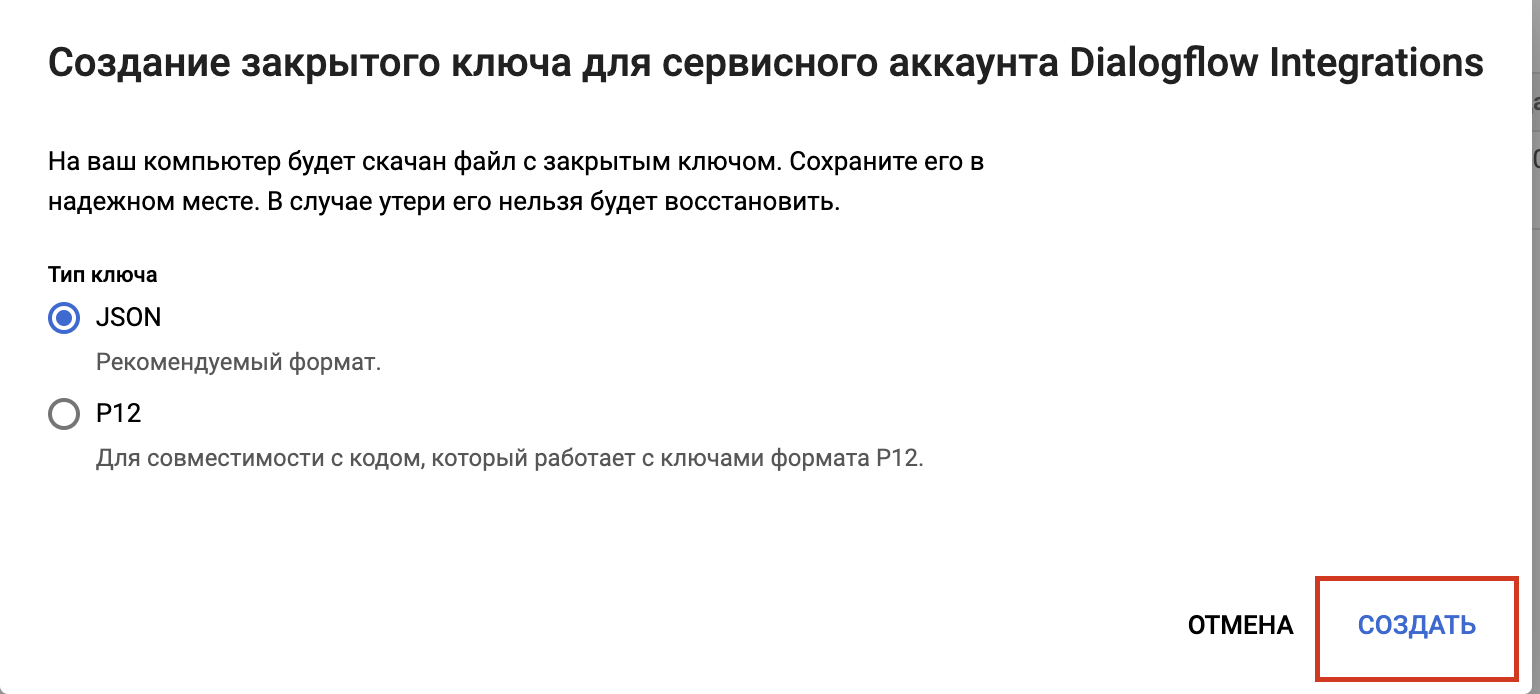

JSON должен скачаться. Выберите директорию с ботом

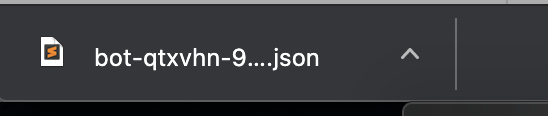

## Шаг 4 Настройки соединения

Перейдем в настройки в DialogFlow и скопипуем PROJECT ID

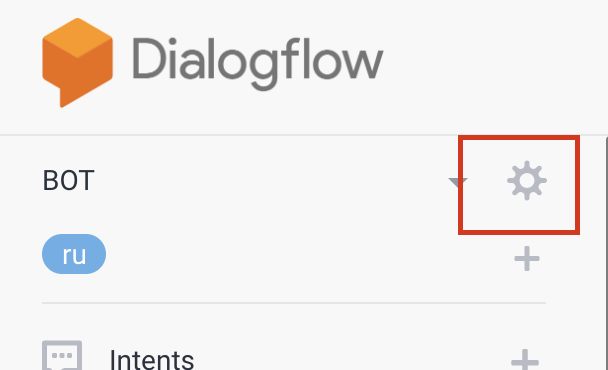

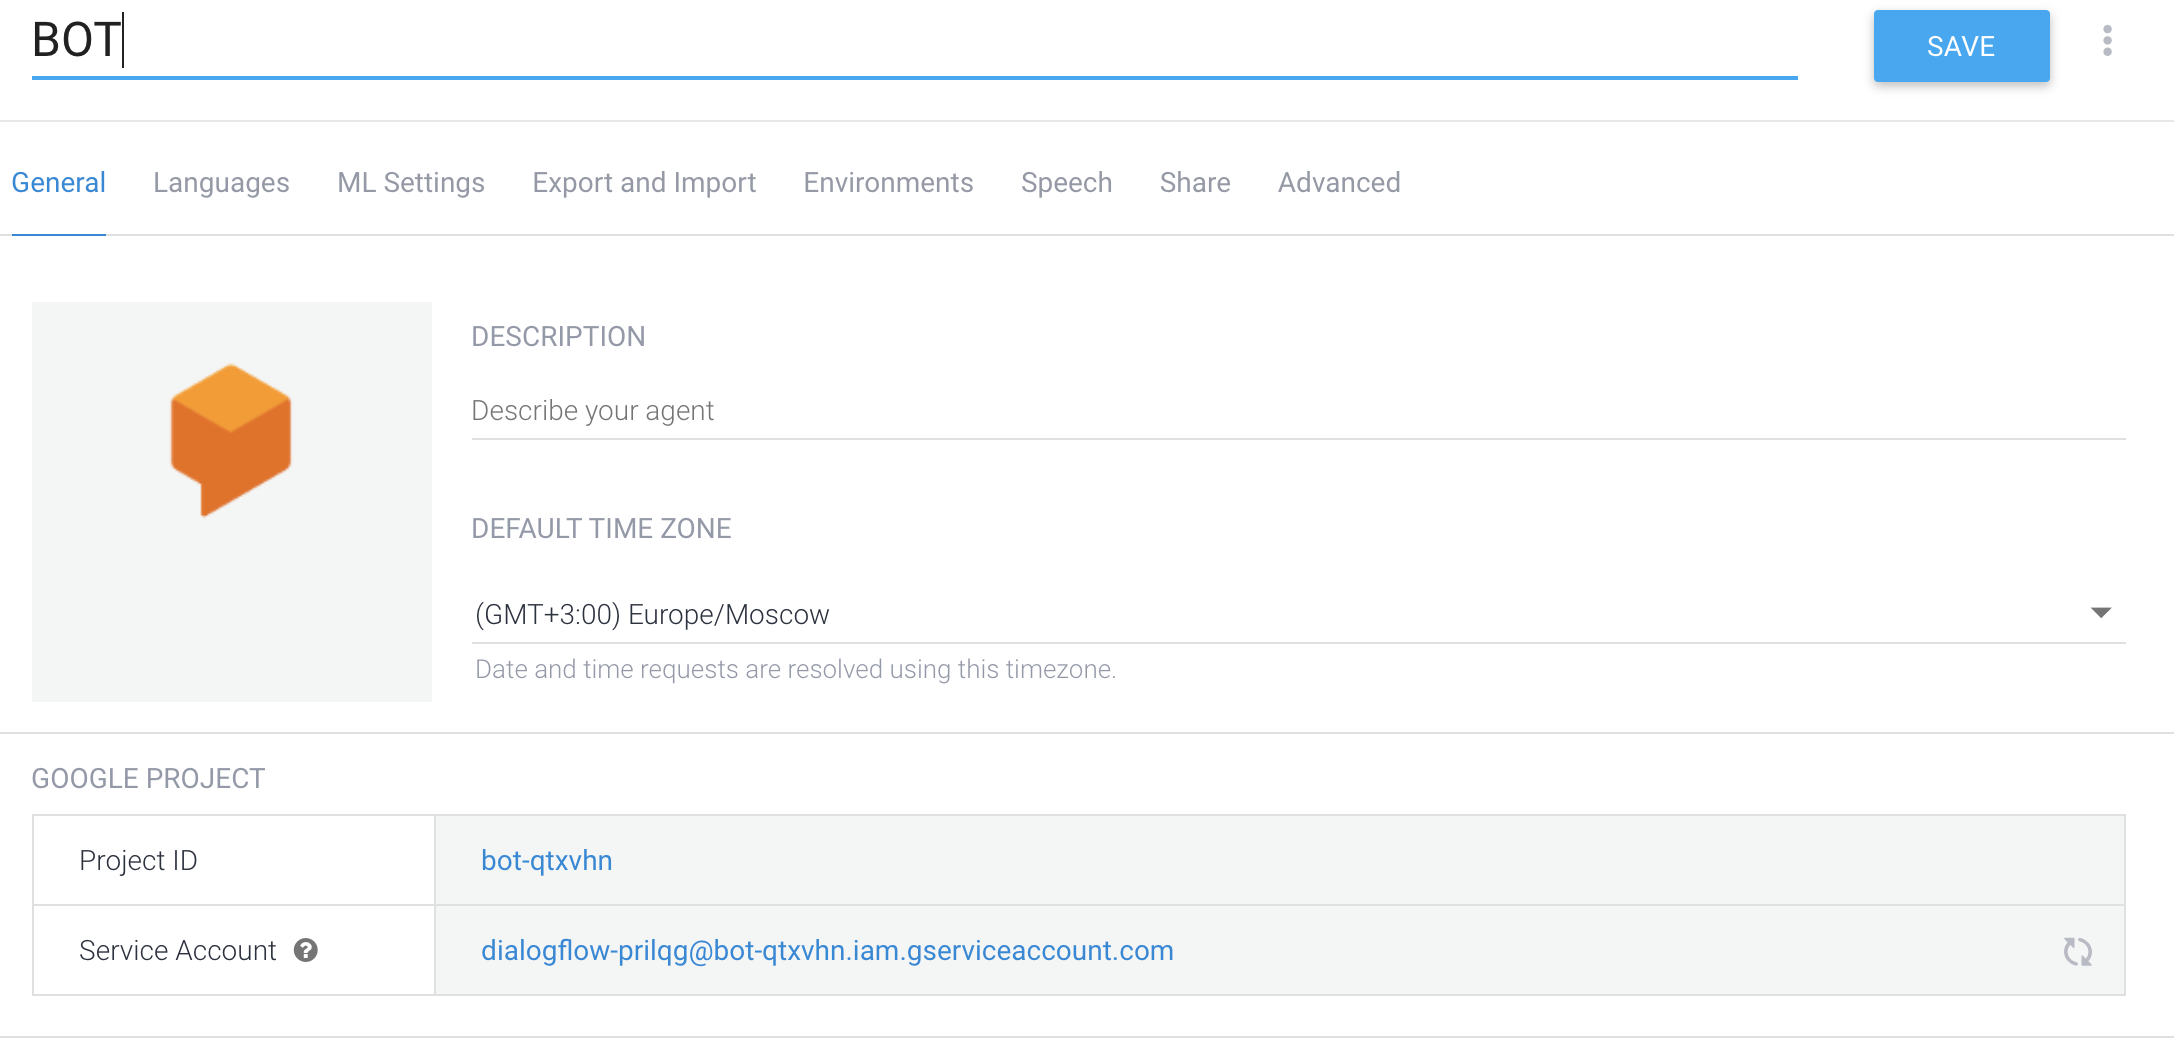

In [8]:
!ls

chat-bot.ipynb		      lesson_16.ipynb
gbnlp-afdu-aac18209b96f.json  ProductsDataset.csv
lesson15.zip		      topic_modeling_lesson4_actual.ipynb


In [10]:
import os
import logging
from telegram import Update
from telegram.ext import Updater, CommandHandler, MessageHandler, Filters, CallbackContext

import dialogflow

In [11]:
updater = Updater(token='1234567890:A0000000000rno8jyce60z1D30000000000', use_context=True)  # Токен API к Telegram
dispatcher = updater.dispatcher
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'gbnlp-afdu-aac18209b96f.json'# скачнный JSON


DIALOGFLOW_PROJECT_ID = 'gbnlp-afdu' #PROJECT ID из DialogFlow 
DIALOGFLOW_LANGUAGE_CODE = 'ru' # язык
SESSION_ID = 'GBNLP10_2020_bot'  # ID бота из телеграма

Переписываем функцию textMessage

In [12]:
def startCommand1(update: Update, context: CallbackContext):
    update.message.reply_text('Добрый день!')

    
def textMessage1(update: Update, context: CallbackContext):
    session_client = dialogflow.SessionsClient()
    session = session_client.session_path(DIALOGFLOW_PROJECT_ID, SESSION_ID)
    
    text_input = dialogflow.types.TextInput(text=update.message.text , language_code=DIALOGFLOW_LANGUAGE_CODE)
    query_input = dialogflow.types.QueryInput(text=text_input)
    
    try:
        response = session_client.detect_intent(session=session, query_input=query_input)
    except InvalidArgument:
         raise

    text = response.query_result.fulfillment_text
    if text:
        update.message.reply_text(response.query_result.fulfillment_text)
    else:
        update.message.reply_text('Что?')

In [13]:
# on different commands - answer in Telegram
dispatcher.add_handler(CommandHandler("start", startCommand1))
dispatcher.add_handler(MessageHandler(Filters.text & ~Filters.command, textMessage1))

In [ ]:
# Start the Bot
updater.start_polling()
updater.idle()

In [ ]:
# Хендлеры
start_command_handler = CommandHandler('start', startCommand)
text_message_handler = MessageHandler(Filters.text, textMessage)
# Добавляем хендлеры в диспетчер
dispatcher.add_handler(start_command_handler)
dispatcher.add_handler(text_message_handler)
# Начинаем поиск обновлений
updater.start_polling(clean=True)
# Останавливаем бота, если были нажаты Ctrl + C
updater.idle()